<a href="https://colab.research.google.com/github/francesco-source/Machine-Learning/blob/main/Assosiation_Rules_17_02_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assosiation Rules Exam 17/02/202

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## 1.  Read a transactions database in sparse format from a txt file into a list of lists. The file contains one transaction per line, each line has a variable number of items, separated by a separator. The external list will have a list for each transaction, each transaction is a list of items. Show the first two transactions.


In [10]:
file1 = open('online_retail_red.txt', 'r')
Lines = file1.readlines()
# Strips the newline character
data_list = [line[:-1].split(";") for line in Lines]
print("The first transaction is: ",data_list[0])
print("The second transaction is: ",data_list[1])

The first transaction is:  ['CREAM CUPID HEARTS COAT HANGER', 'GLASS STAR FROSTED T-LIGHT HOLDER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN']
The second transaction is:  ['HAND WARMER RED POLKA DOT', 'HAND WARMER UNION JACK']


## 2.  Encode the list of lists into a binary representation and transform it into a dataframe whose columns are the items show the head of that dataframe

In [13]:
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(data_list)
df = pd.DataFrame(encoded_transactions,columns = encoder.columns_)
df.head()

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,...,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 3.  Find a value of min_support such that the apriori algorithm generates at least 8 frequent itemsets with at least 2 items. Output the result with the message below


In [14]:
min_itemsets = 8

min_item_in_itemset = 2

# "Reasonable" range
support_range = np.arange(0.1, 0.01, -0.01)

In [15]:
min_support = 0

for s_value in support_range:
  print(f"Trying support value {s_value:.2f}")

  frequent_itemsets = apriori(df, min_support = s_value, use_colnames = True)

  frequent_itemsets["len"] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Calculate the number of itemsets that contain at least min_item_in_itemset items
  frequent_itemstets_len = len([i for i in frequent_itemsets["len"].values if i >= min_item_in_itemset])

  if frequent_itemstets_len >=min_itemsets:
    break
print("I've selected as a support:",np.round(s_value,2))
print("It produces a number of item_sets equal to:",frequent_itemstets_len,"with a number of min samples per items equal to:",2)

Trying support value 0.10
Trying support value 0.09
Trying support value 0.08
Trying support value 0.07
Trying support value 0.06
Trying support value 0.05
Trying support value 0.04
Trying support value 0.03
I've selected as a support: 0.03
It produces a number of item_sets equal to: 12 with a number of min samples per items equal to: 2


## 4. Find the minimum metric threshold such that at least 10 association rules are extracted from the frequent itemsets found 

In [16]:
metric = "confidence"

num_rules = 10

threshold = np.arange(1,0.01,-0.01)
min_t = 0

for t in threshold:

  min_t = t

  rules = association_rules(frequent_itemsets, metric=metric, min_threshold=t)

  if len(rules["confidence"].values)>=num_rules:

    break

print("The minimun threshold for confidence is equal to: ",np.round(min_t,4)," in order to generate ",num_rules," rules.")

The minimun threshold for confidence is equal to:  0.61  in order to generate  10  rules.


## 5. Print the first 10 rules found, sorted by descending confidence and support

In [18]:
sorted_rules = rules.sort_values(by = ["confidence","support"],ascending=False).head(10)
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.039331,0.052255,0.032282,0.820768,15.707077,0.030226,5.287817
10,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.039331,0.053541,0.030547,0.776671,14.505982,0.028441,4.237964
4,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.052255,0.053541,0.039219,0.750535,14.017835,0.036421,3.793958
5,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.053541,0.052255,0.039219,0.732497,14.017835,0.036421,3.542939
1,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.041960,0.050241,0.030267,0.721333,14.357586,0.028159,3.408228
7,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.064843,0.108426,0.043919,0.677308,6.246751,0.036888,2.762927
9,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.044758,0.062941,0.030100,0.672500,10.684680,0.027283,2.861250
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.049010,0.052031,0.031498,0.642694,12.352165,0.028948,2.653102
6,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.050912,0.108426,0.031890,0.626374,5.776988,0.026370,2.386273
3,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.052255,0.039331,0.032282,0.617773,15.707077,0.030226,2.513347


## 6. Plot confidence and support for all the sorted rules found

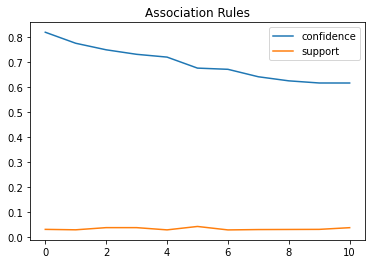

In [19]:
sorted_rules = rules.sort_values(by=['confidence','support'],ascending=False).reset_index(drop=True)
sorted_rules[['confidence','support']].plot(title='Association Rules');

## 7.  Scatter plot the rules by confidence and support, labelling the points with the index value of the corresponding rule

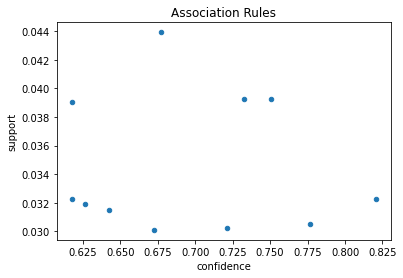

In [20]:
fig = sorted_rules.plot.scatter(x = 'confidence', y = 'support', title ='Association Rules');